In [165]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
import requests

In [166]:
""" import pandas as pd

df = pd.read_csv("C:/Users/pc/Desktop/historique_stations.csv")
df.head()
 """

' import pandas as pd\n\ndf = pd.read_csv("C:/Users/pc/Desktop/historique_stations.csv")\ndf.head()\n '

In [167]:
velib = pl.read_csv("C:/Users/pc/Desktop/historique_stations.csv")
velib.head()

datetime,capacity,available_mechanical,available_electrical,station_name,station_geo,operative
str,i64,i64,i64,str,str,bool
"""2020-11-26T12:59Z""",35,4,5,"""Benjamin Godard - Victor Hugo""","""48.86598,2.27572""",true
"""2020-11-26T12:59Z""",55,23,4,"""André Mazet - Saint-André des …","""48.85376,2.33910""",true
"""2020-11-26T12:59Z""",20,0,0,"""Charonne - Robert et Sonia Del…","""48.85591,2.39257""",true
"""2020-11-26T12:59Z""",21,0,1,"""Toudouze - Clauzel""","""48.87930,2.33736""",true
"""2020-11-26T12:59Z""",30,3,1,"""Mairie du 12ème""","""48.84086,2.38755""",true


In [168]:
velib.tail()

datetime,capacity,available_mechanical,available_electrical,station_name,station_geo,operative
str,i64,i64,i64,str,str,bool
"""2021-04-09T14:37Z""",38,4,2,"""Général Michel Bizot - Claude …","""48.83481,2.40093""",true
"""2021-04-09T14:37Z""",20,2,1,"""Ivry - Baudricourt""","""48.82470,2.36311""",true
"""2021-04-09T14:37Z""",39,17,0,"""Saint-Mandé - Docteur Arnold N…","""48.84463,2.40495""",true
"""2021-04-09T14:37Z""",21,12,4,"""Saint-Marcel - Hôpital""","""48.83950,2.36099""",true
"""2021-04-09T14:37Z""",36,12,5,"""Guynemer - Jardin du Luxembour…","""48.84661,2.33255""",true


In [169]:
# statistical summary
velib.describe()

statistic,datetime,capacity,available_mechanical,available_electrical,station_name,station_geo,operative
str,str,f64,f64,f64,str,str,f64
"""count""","""10986730""",1.098673e7,1.098673e7,1.098673e7,"""10986730""","""10986730""",1.098673e7
"""null_count""","""0""",0.0,0.0,0.0,"""0""","""0""",0.0
"""mean""",null,31.465766,7.845411,3.502016,null,null,0.980206
"""std""",null,12.018012,9.007581,3.144555,null,null,null
"""min""","""2020-11-26T12:59Z""",0.0,0.0,0.0,""" Jean Bleuzen - Square du 11 N…","""48.76462,2.40712""",0.0
"""25%""",null,23.0,1.0,1.0,null,null,null
"""50%""",null,30.0,5.0,3.0,null,null,null
"""75%""",null,37.0,11.0,5.0,null,null,null
"""max""","""2021-04-09T14:37Z""",74.0,73.0,41.0,"""Île de la Jatte""","""48.94702,2.25690""",1.0


In [170]:
# parse datetime column and extract date and time
velib = velib.with_columns(
    # Step 1: Parse the string into a Datetime object
    # Polars' default parser usually handles ISO 8601 format (T separator, Z for UTC)
    datetime = pl.col("datetime").str.to_datetime()
).with_columns(
    # Step 2: Extract Date and Time from the new Datetime object
    date = pl.col("datetime").dt.date(),
    time = pl.col("datetime").dt.time()
)


# create new columns
total_available = pl.col("available_mechanical") + pl.col("available_electrical")

velib = velib.with_columns(
    total_available = total_available,
    free_terminals = pl.col("capacity") - total_available,
    lat = pl.col("station_geo").str.split(",").list.first().cast(float),
    lon = pl.col("station_geo").str.split(",").list.last().cast(float)
)

velib.head()

datetime,capacity,available_mechanical,available_electrical,station_name,station_geo,operative,date,time,total_available,free_terminals,lat,lon
"datetime[μs, UTC]",i64,i64,i64,str,str,bool,date,time,i64,i64,f64,f64
2020-11-26 12:59:00 UTC,35,4,5,"""Benjamin Godard - Victor Hugo""","""48.86598,2.27572""",true,2020-11-26,12:59:00,9,26,48.86598,2.27572
2020-11-26 12:59:00 UTC,55,23,4,"""André Mazet - Saint-André des …","""48.85376,2.33910""",true,2020-11-26,12:59:00,27,28,48.85376,2.3391
2020-11-26 12:59:00 UTC,20,0,0,"""Charonne - Robert et Sonia Del…","""48.85591,2.39257""",true,2020-11-26,12:59:00,0,20,48.85591,2.39257
2020-11-26 12:59:00 UTC,21,0,1,"""Toudouze - Clauzel""","""48.87930,2.33736""",true,2020-11-26,12:59:00,1,20,48.8793,2.33736
2020-11-26 12:59:00 UTC,30,3,1,"""Mairie du 12ème""","""48.84086,2.38755""",true,2020-11-26,12:59:00,4,26,48.84086,2.38755


In [175]:
# Extract hour from time column
velib = velib.with_columns(
    hour = pl.col("time").cast(str).str.slice(0, 2).cast(pl.Int32)
)

# Group by date, hour, and station, taking last value in each hour
velib = velib.group_by(["date", "hour", "station_name", "station_geo"]).agg([
    pl.col("total_available").last(),
    pl.col("available_mechanical").last(), 
    pl.col("available_electrical").last(),
    pl.col("free_terminals").last()
])

In [177]:
# drop datetime column and reorder columns
velib = velib.select([
    "date",
    "hour",
    "station_name", 
    "station_geo",
    "total_available",
    "available_mechanical",
    "available_electrical",
    "free_terminals"
]).sort(["date", "hour", "station_name"])

velib.sample(10)

date,hour,station_name,station_geo,total_available,available_mechanical,available_electrical,free_terminals
date,i32,str,str,i64,i64,i64,i64
2021-03-07,4,"""Marché Saint-Quentin""","""48.87736,2.35451""",8,1,7,7
2021-01-20,4,"""Lac Daumesnil - Saint-Maurice""","""48.82775,2.41837""",1,0,1,49
2020-11-30,21,"""Mairie du Kremlin-Bicêtre""","""48.81192,2.35702""",0,0,0,25
2020-12-12,21,"""Croulebarde - Corvisart""","""48.83098,2.34816""",31,22,9,3
2021-03-06,8,"""Hôpital Robert Debré""","""48.88005,2.40087""",4,1,3,29
2021-02-01,4,"""Rond-Point Rhin et Danube""","""48.84045,2.22802""",38,34,4,15
2021-03-15,11,"""Place Paul Delouvrier""","""48.89198,2.38513""",5,2,3,21
2020-12-30,21,"""Récollets - Square Villemin""","""48.87503,2.35980""",8,8,0,9
2021-03-25,7,"""Cimetière de Montmartre""","""48.88647,2.33289""",6,2,4,37


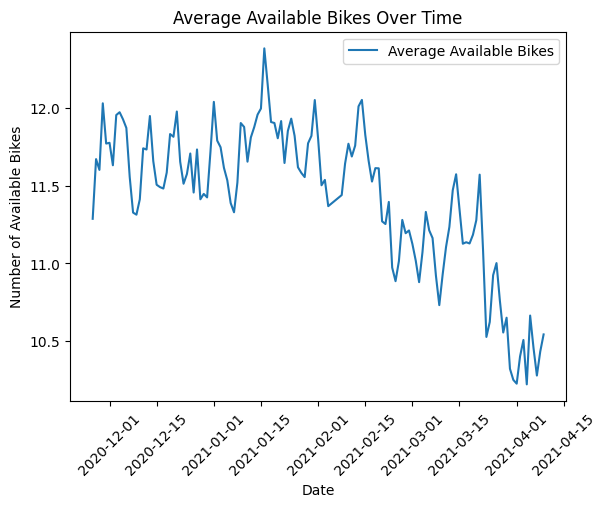

In [178]:
# Group by date and calculate mean total_available across all stations
daily_avg = velib.group_by("date").agg(avg_available=pl.col("total_available").mean()).sort("date")

plt.plot(daily_avg["date"], daily_avg["avg_available"], label='Average Available Bikes')
plt.xlabel('Date')
plt.ylabel('Number of Available Bikes')
plt.title('Average Available Bikes Over Time')
plt.xticks(rotation=45)
plt.legend()

In [179]:
# Create a mapping of unique station names to IDs
station_mapping = (
    velib.sort("station_name")
    .select("station_name")
    .unique()
    .with_row_index("station_id")
)

# Add station IDs to original dataframe by joining on station_name
new_df = velib.join(
    station_mapping,
    on="station_name",
    how="left"
)

print("before casting: ", new_df["station_id"].dtype)

new_df = new_df.with_columns(
    pl.col("station_id").cast(pl.Int32),
)

""" new_df = new_df.with_columns(
    pl.col("station_id").cast(pl.Categorical)
) """

print("after casting: ", new_df["station_id"].dtype)


before casting:  UInt32
after casting:  Int32


In [193]:
# Create a mapping of unique station names to IDs
station_mapping = (
    velib.sort("station_name")
    .select("station_name")
    .unique()
    .with_row_index("station_id")
)

# Add station IDs to original dataframe by joining on station_name
new_df = velib.join(
    station_mapping,
    on="station_name",
    how="left"
)

new_df = new_df.with_columns(
    pl.col("station_id").cast(pl.String).cast(pl.Categorical)
)

# Replace station_name with station_id and reorder columns
new_df = new_df.select([
    "date",
    "hour", 
    "station_id",
    "total_available",
    "available_mechanical", 
    "available_electrical",
    "free_terminals"
])

print("Station ID Mapping:")
print(station_mapping.head())
print("\nUpdated Velib Data:")
new_df.head()

Station ID Mapping:
shape: (5, 2)
┌────────────┬─────────────────────────────────┐
│ station_id ┆ station_name                    │
│ ---        ┆ ---                             │
│ u32        ┆ str                             │
╞════════════╪═════════════════════════════════╡
│ 0          ┆  Jean Bleuzen - Square du 11 N… │
│ 1          ┆  Place Léon Gambetta            │
│ 2          ┆ 11 Novembre 1918 - 8 Mai 1945   │
│ 3          ┆ 18 juin 1940 - Buzenval         │
│ 4          ┆ 8 Mai 1945 - 10 Juillet 1940    │
└────────────┴─────────────────────────────────┘

Updated Velib Data:


date,hour,station_id,total_available,available_mechanical,available_electrical,free_terminals
date,i32,cat,i64,i64,i64,i64
2020-11-26,12,"""0""",4,0,4,45
2020-11-26,12,"""1""",20,15,5,6
2020-11-26,12,"""2""",5,3,2,31
2020-11-26,12,"""3""",3,2,1,22
2020-11-26,12,"""4""",0,0,0,30


In [194]:
# Sort by station_id, date and hour to ensure proper lag calculation
df_sorted = new_df.sort(["station_id", "date", "hour"])

# Get unique station IDs
unique_stations = df_sorted.get_column("station_id").unique().to_list()

# Create list to store DataFrames with lagged features for each station
station_lag_dfs = []

# For each station, create lagged features
for station_id in unique_stations:
    # Filter data for current station
    station_df = df_sorted.filter(pl.col("station_id") == station_id)
    
    # Create lag columns for total_available
    lag_columns = []
    for i in range(1, 25):
        lag_columns.append(
            pl.col("total_available").shift(i).alias(f"total_available_lag_{i}")
        )
    
    # Add lag columns to station DataFrame
    station_with_lags = station_df.with_columns(lag_columns).select(
        ["station_id", "date", "hour", "total_available"] + 
        [f"total_available_lag_{i}" for i in range(1, 25)]
    )
    
    # Drop rows with any null values (first 24 hours)
    station_with_lags = station_with_lags.drop_nulls()
    
    if len(station_with_lags) > 0:  # Only append if we have data after dropping nulls
        station_lag_dfs.append(station_with_lags)


In [195]:
idx = np.random.randint(0, len(station_lag_dfs))
print(f"Created lag features for {len(station_lag_dfs)} stations")
print(f"\nExample of lagged features for station {idx}:")
print(f"Shape of the station's DataFrame: {station_lag_dfs[idx].shape}")
station_lag_dfs[idx].head(10)

Created lag features for 1396 stations

Example of lagged features for station 966:
Shape of the station's DataFrame: (3056, 28)


station_id,date,hour,total_available,total_available_lag_1,total_available_lag_2,total_available_lag_3,total_available_lag_4,total_available_lag_5,total_available_lag_6,total_available_lag_7,total_available_lag_8,total_available_lag_9,total_available_lag_10,total_available_lag_11,total_available_lag_12,total_available_lag_13,total_available_lag_14,total_available_lag_15,total_available_lag_16,total_available_lag_17,total_available_lag_18,total_available_lag_19,total_available_lag_20,total_available_lag_21,total_available_lag_22,total_available_lag_23,total_available_lag_24
cat,date,i32,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""970""",2020-11-27,12,0,3,3,3,6,0,2,5,5,5,5,5,5,5,5,6,3,4,7,6,10,11,5,5,4
"""970""",2020-11-27,13,5,0,3,3,3,6,0,2,5,5,5,5,5,5,5,5,6,3,4,7,6,10,11,5,5
"""970""",2020-11-27,14,7,5,0,3,3,3,6,0,2,5,5,5,5,5,5,5,5,6,3,4,7,6,10,11,5
"""970""",2020-11-27,15,11,7,5,0,3,3,3,6,0,2,5,5,5,5,5,5,5,5,6,3,4,7,6,10,11
"""970""",2020-11-27,16,5,11,7,5,0,3,3,3,6,0,2,5,5,5,5,5,5,5,5,6,3,4,7,6,10
"""970""",2020-11-27,17,0,5,11,7,5,0,3,3,3,6,0,2,5,5,5,5,5,5,5,5,6,3,4,7,6
"""970""",2020-11-27,18,0,0,5,11,7,5,0,3,3,3,6,0,2,5,5,5,5,5,5,5,5,6,3,4,7
"""970""",2020-11-27,19,7,0,0,5,11,7,5,0,3,3,3,6,0,2,5,5,5,5,5,5,5,5,6,3,4
"""970""",2020-11-27,20,9,7,0,0,5,11,7,5,0,3,3,3,6,0,2,5,5,5,5,5,5,5,5,6,3
